In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import os

%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/traffic.csv")
data.head()

,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0


In [ ]:
data.shape

(1916, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    232 non-null    object 
 1   Visits  232 non-null    float64
dtypes: float64(1), object(1)
memory usage: 30.1+ KB


In [ ]:
data.describe()

,Visits
count,232.000000
mean,4081.435345
std,1018.730432
min,1554.000000
25%,3428.250000
50%,3988.000000
75%,4874.750000
max,6659.000000


In [ ]:
data.isnull().sum()

Date      1684
Visits    1684
dtype: int64

In [ ]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)

In [ ]:
data["Date"] = pd.to_datetime(data["Date"], format='%d/%m/%Y')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    232 non-null    datetime64[ns]
 1   Visits  232 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.1 KB


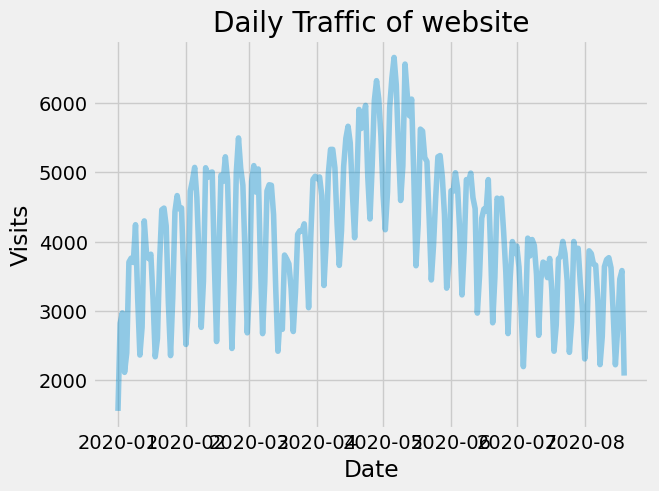

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(data["Date"], data["Visits"], alpha = 0.4)
plt.title("Daily Traffic of website")
plt.xlabel('Date')
plt.ylabel('Visits')
plt.show()

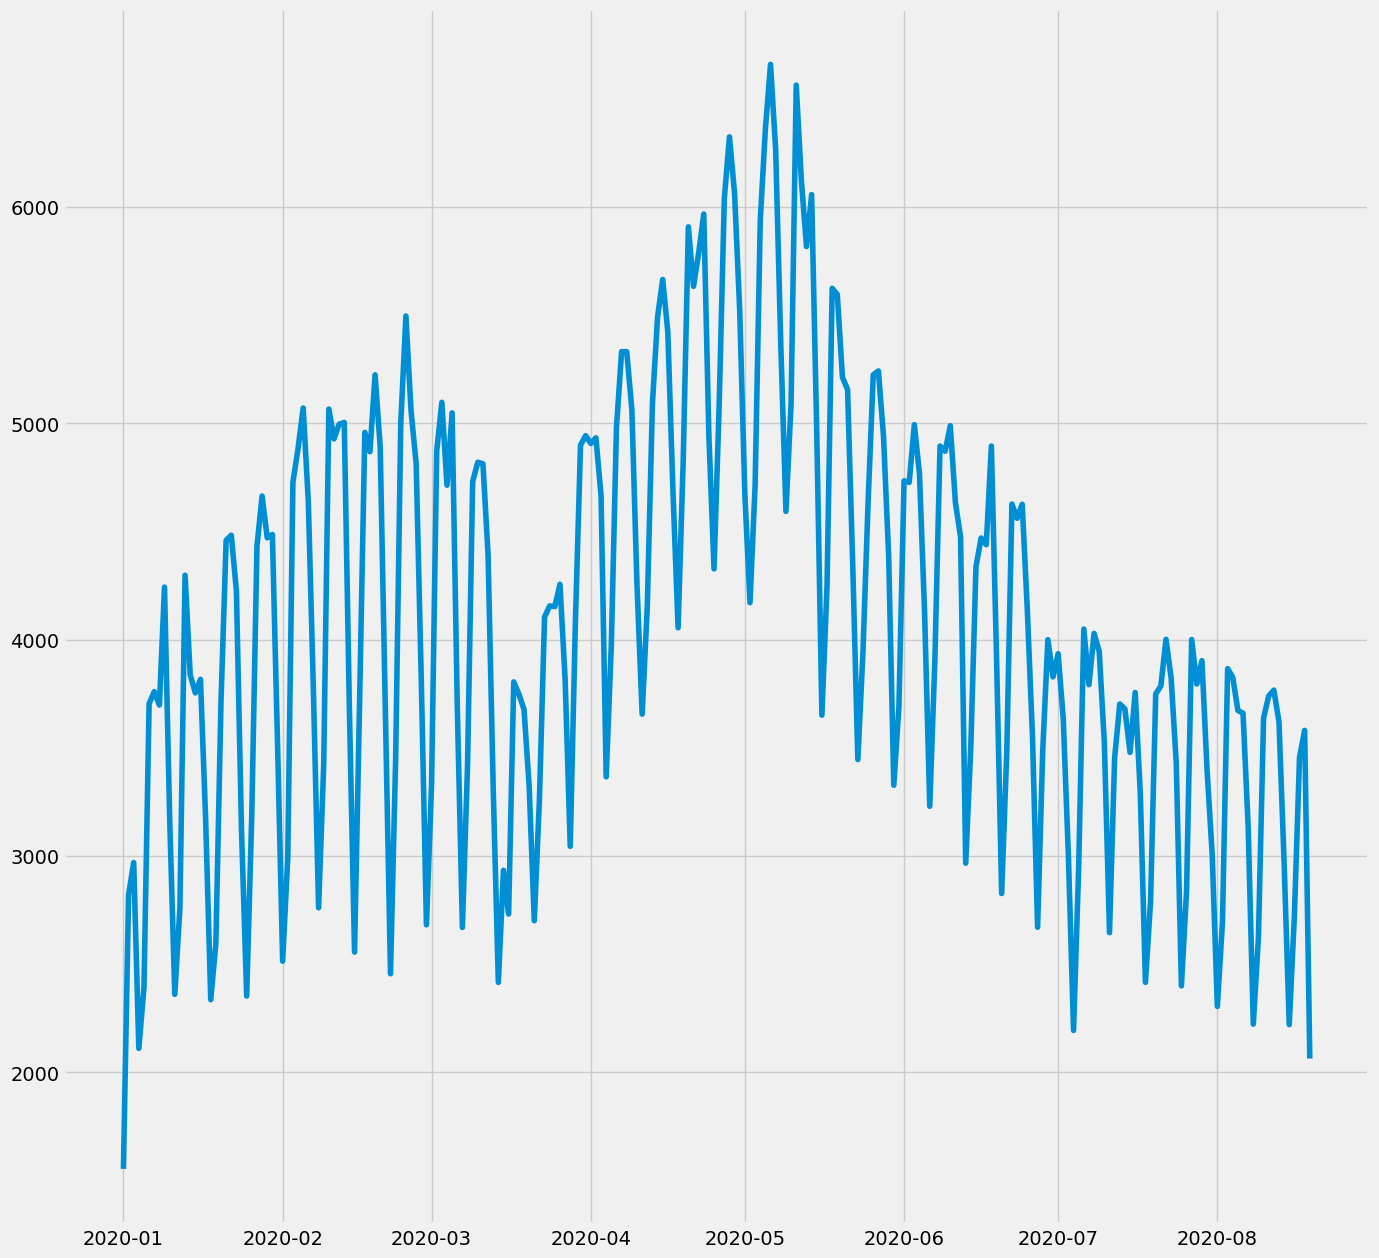

In [ ]:
plt.figure(figsize=(15, 15))
plt.plot(data["Date"], data["Visits"])
plt.show()

In [ ]:
result = seasonal_decompose(data["Visits"],model='multiplicative',period=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

ValueError: ignored

In [ ]:
data = data.dropna(axis=0)

<Figure size 640x480 with 0 Axes>

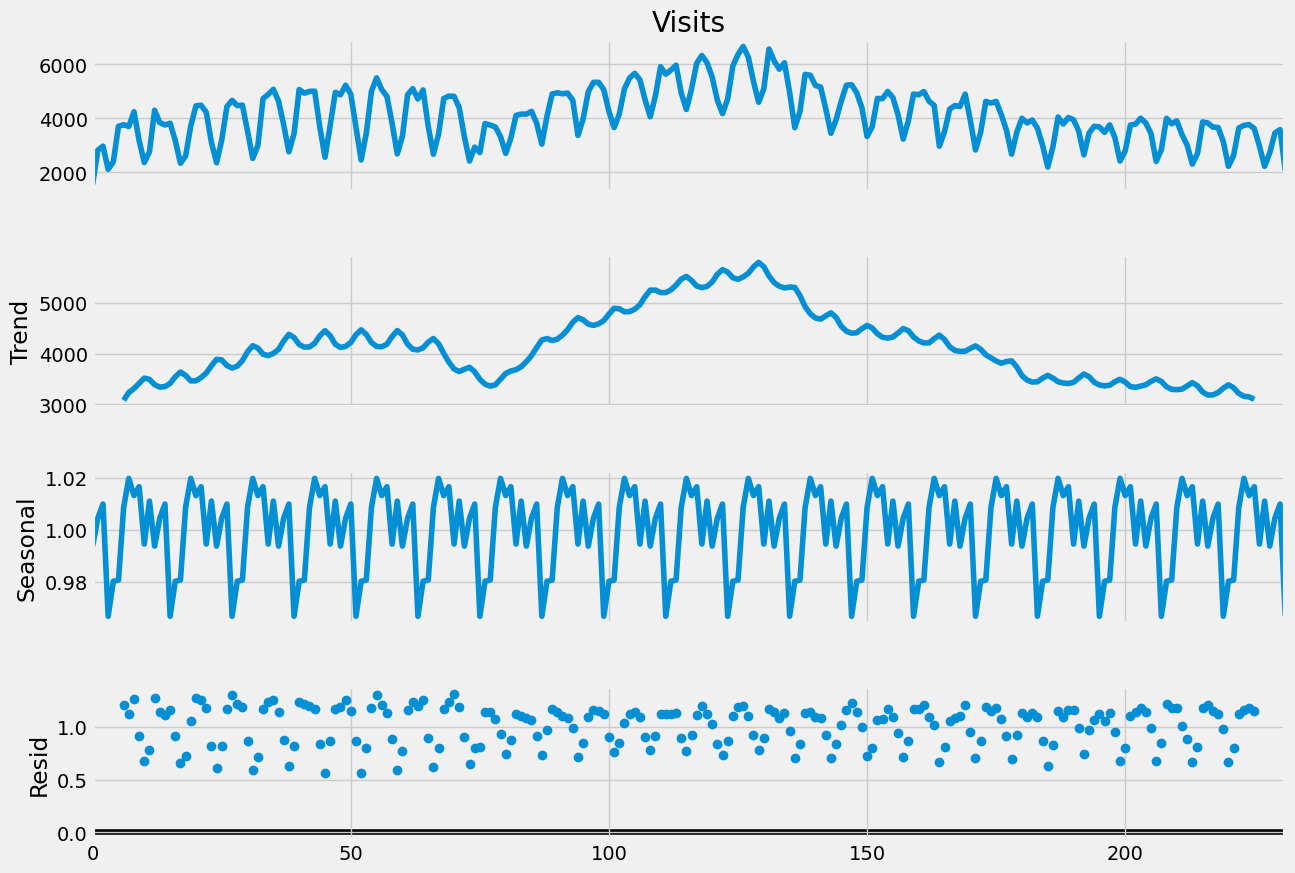

In [ ]:
result = seasonal_decompose(data["Visits"],model='multiplicative',period=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

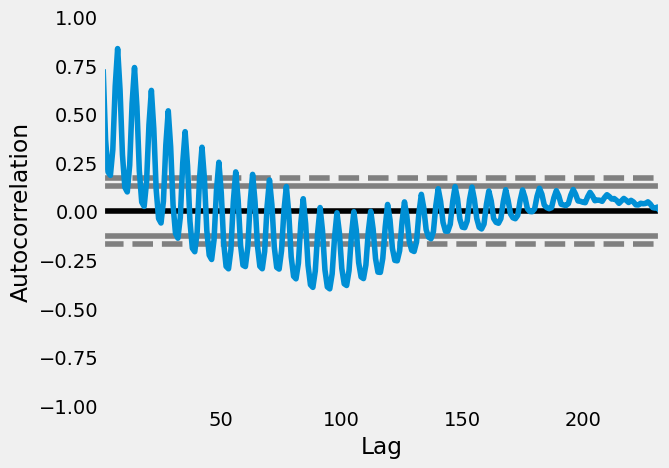

In [ ]:
pd.plotting.autocorrelation_plot(data["Visits"])

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(data["Visits"], order=(5, 1, 2), seasonal_order=(5, 1, 2, 12))
model = model.fit()
preds = model.predict(len(data), len(data) + 50)
preds

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


232    2352.185098
233    2247.202593
234    1945.458220
235    2423.987474
236    3517.563443
237    3214.254800
238    2271.869429
239    2239.116471
240    2169.438618
241    1853.191609
242    2409.081051
243    2940.441761
244    2768.489999
245    2118.750390
246    2062.766987
247    2120.586680
248    1877.110381
249    2318.542335
250    2905.772003
251    2791.799742
252    2087.914502
253    1975.443858
254    1945.165242
255    1492.828917
256    1961.909327
257    2653.451317
258    2599.992230
259    2086.718326
260    1840.384202
261    1801.529241
262    1604.160090
263    2085.610564
264    2518.432161
265    2488.443424
266    1997.000208
267    1608.931256
268    1556.682583
269    1540.075273
270    1966.460782
271    2446.411489
272    2301.125410
273    1915.765078
274    1624.883701
275    1645.121138
276    1514.962507
277    1906.063209
278    2294.680471
279    1977.722397
280    1634.861667
281    1484.273878
282    1497.350290
Name: predicted_mean, dtype: fl

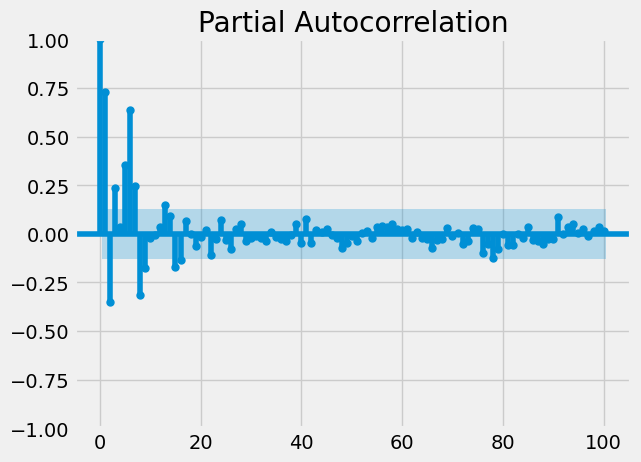

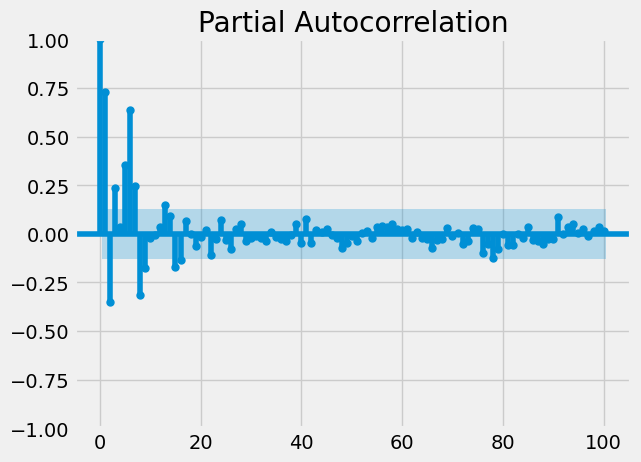

In [ ]:
plot_pacf(data["Visits"], lags = 100)

<Axes: >

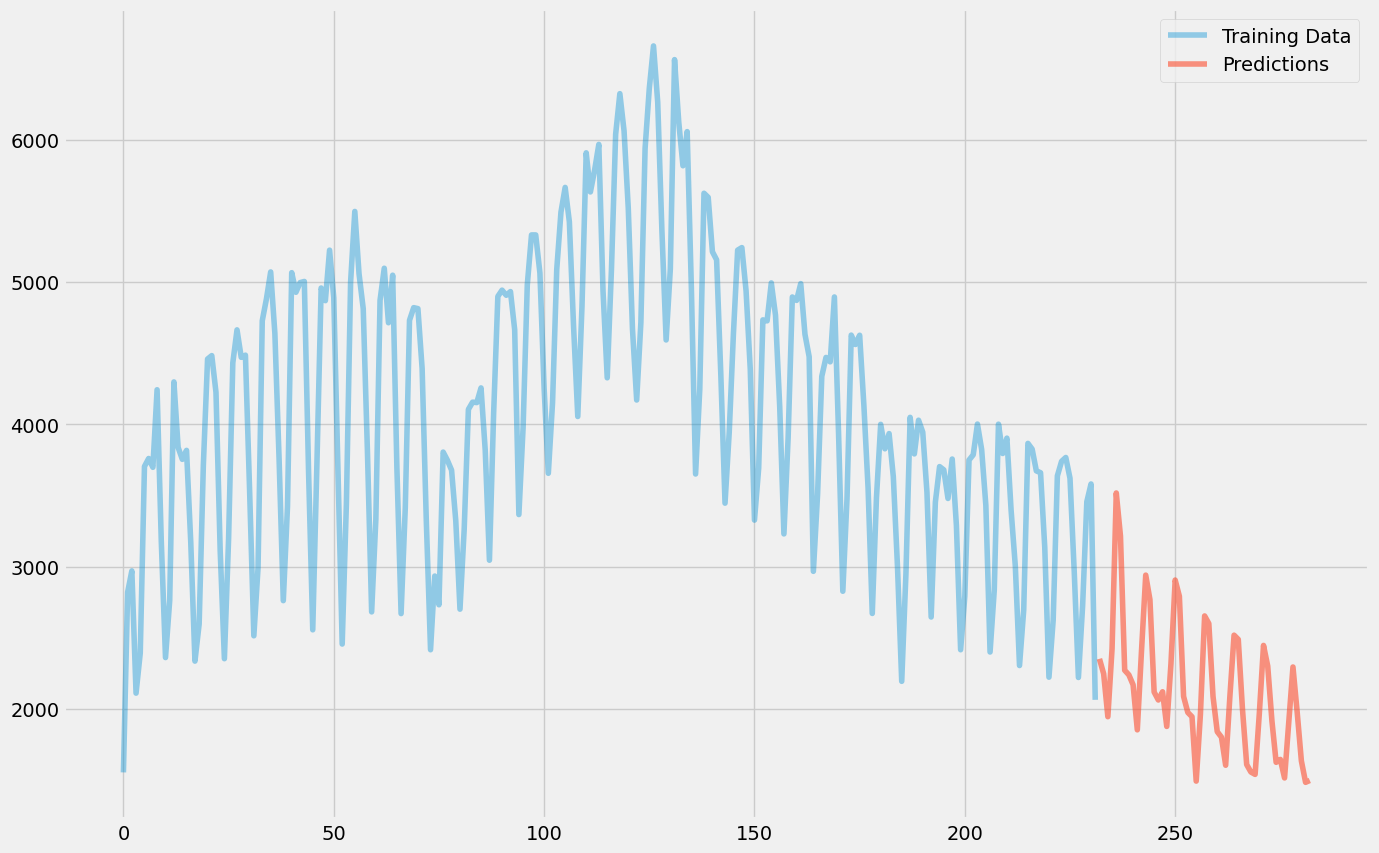

In [ ]:
data["Visits"].plot(legend=True, label="Training Data",
                   figsize=(15, 10), alpha=0.4)
preds.plot(legend=True, label="Predictions", alpha=0.6)